In [296]:
import numpy as np
import scipy.io.wavfile as wav
import FFT
import matplotlib.pyplot as plt

In [297]:
fs, audio = wav.read('sinal_1.wav')  

if audio.dtype != np.float32:
    audio = audio / np.iinfo(audio.dtype).max

tempo = np.linspace(0,len(audio)/16000,len(audio))

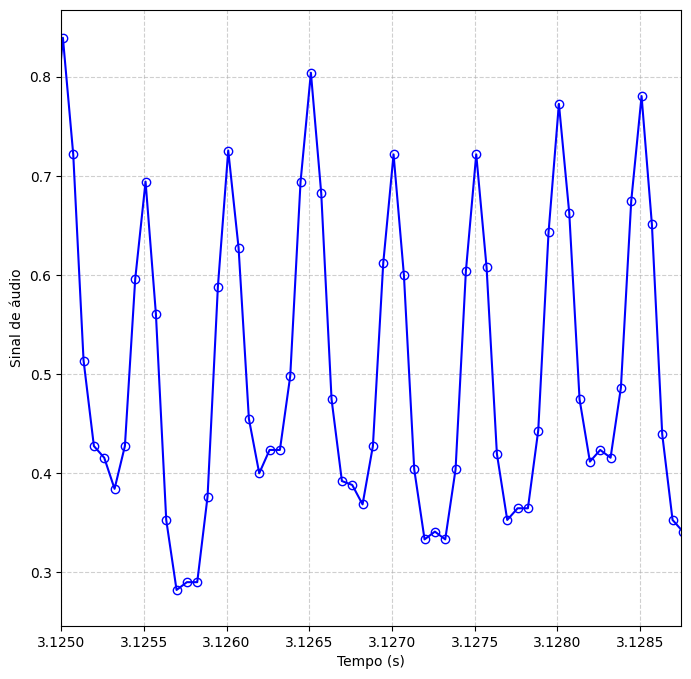

In [298]:
plt.figure(figsize=(8,8))
plt.plot(tempo, audio, "-o", color="blue", markerfacecolor = 'None')
plt.ylabel("Sinal de áudio")
plt.xlabel("Tempo (s)")
plt.xlim(1/16000 *50000,1/16000 *50060)
plt.grid(True, linestyle="--", alpha=0.6)

## FFT

In [299]:
fft_audio = FFT.fft_completa(audio)
freq = FFT.frequencia(fs, fft_audio)

fft_audio = fft_audio[0:len(fft_audio)//2]

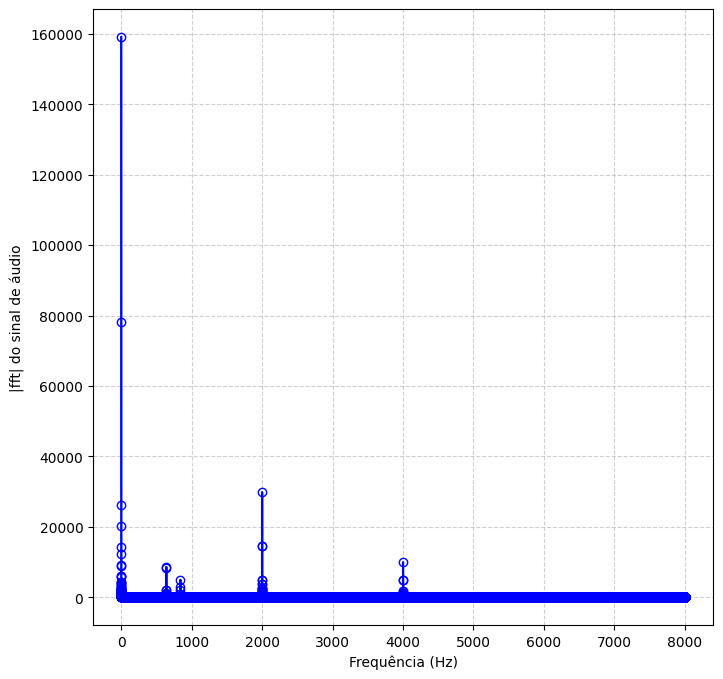

In [300]:
plt.figure(figsize=(8,8))
plt.plot(freq,np.abs(fft_audio))

plt.grid(True)

plt.plot(freq,np.abs(fft_audio), "-o", color="blue", markerfacecolor = 'None')
plt.ylabel("|fft| do sinal de áudio")
plt.xlabel("Frequência (Hz)")
plt.grid(True, linestyle="--", alpha=0.6)

Foi visto que um sistema com fase linear pode ser expresso pela seguinte função de transferência:

$$
h(n) = (-1)^k h(M-n), k \in \mathbb{Z}
$$

Onde:

Para $k = 0$ e $M$ par temos o filtro FIR tipo I;

Para $k = 0$ e $M$ ímpar temos o filtro FIR tipo II;

Para $k = 1$ e $M$ par temos o filtro FIR tipo III;

Para $k = 1$ e $M$ ímpar temos o filtro FIR tipo IV.

Segue os exemplos.

## FIR TIPO 1

$$
H(e^{j\omega}) = e^{-j\omega M/2} \sum_{l=0}^{M/2} a[l]cos(\omega l)
$$

$$
a[l] =
\begin{cases}
h[M/2],& l=0 \\
2h[M/2 - l], & l =1,2,3...\\
\end{cases}
$$

In [301]:
M = 4

h = np.ones(M+1)
h[M//2+1::] = h[0:M//2][::-1]

omega = np.linspace(0, 2*np.pi, 10000)
soma = 0
for l in range(M//2 + 1):
    if (l == 0):
        soma = soma + h[M//2]*np.cos(omega*l)
    else:
        soma = soma + 2*h[M//2 - l]*np.cos(omega*l) 

H = np.exp(-1j*omega*M/2)*soma
fft = FFT.fft_completa(h)

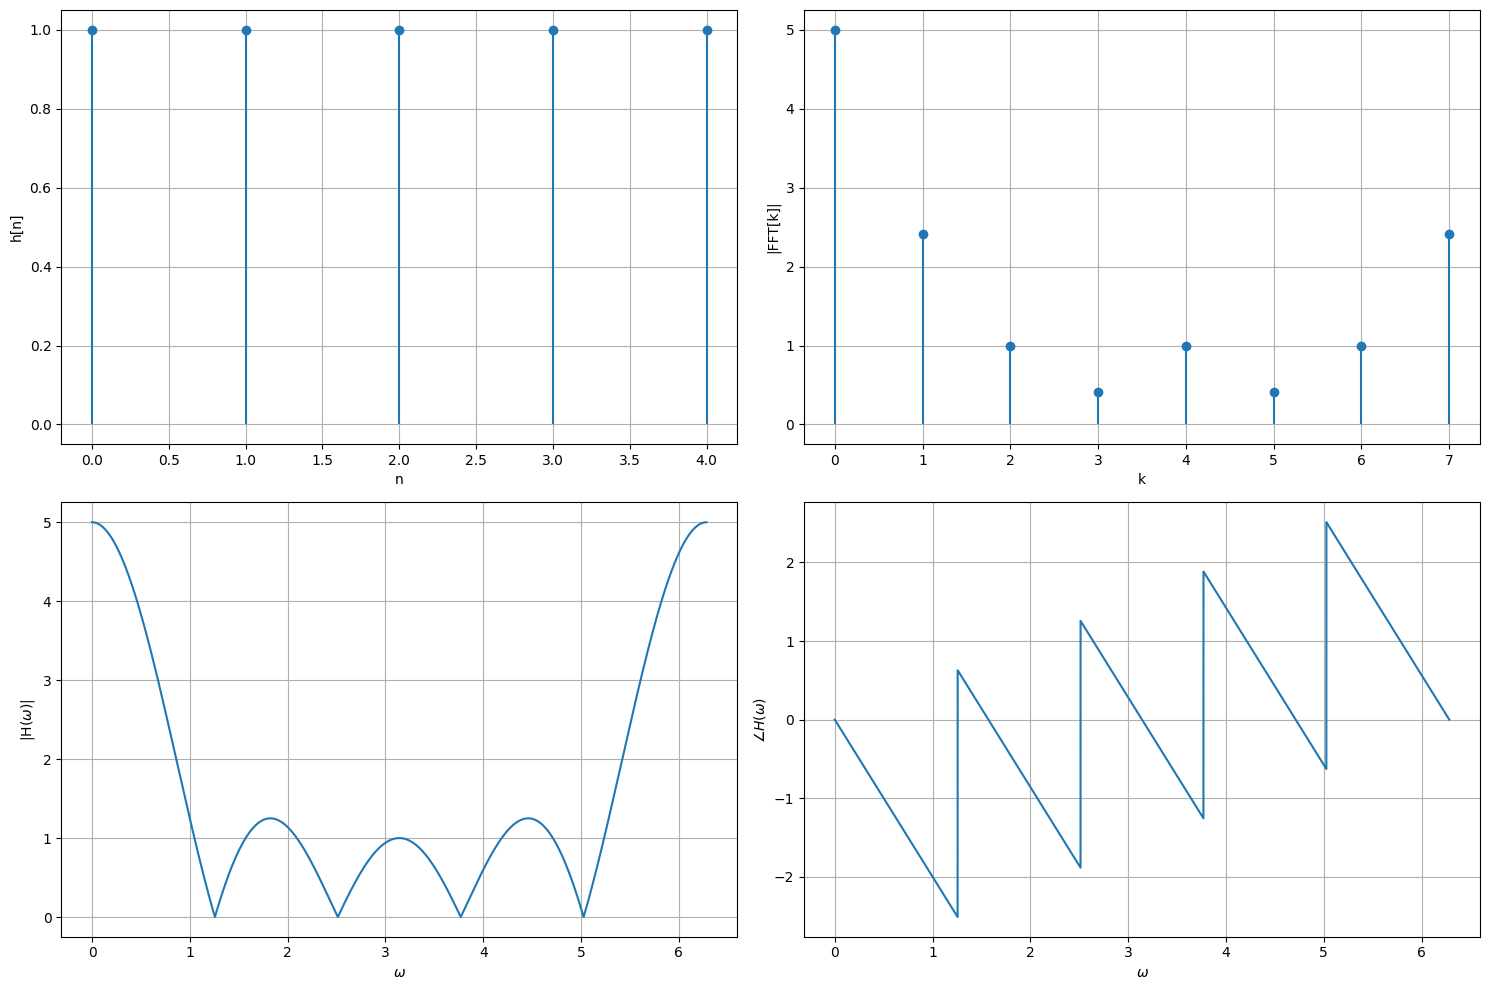

In [302]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

markerline, stemlines, baseline = axs[0,0].stem(h)
baseline.set_visible(False) 
axs[0,0].set_xlabel("n")
axs[0,0].set_ylabel("h[n]")
axs[0,0].grid(True)

markerline, stemlines, baseline = axs[0,1].stem(np.abs(fft))
baseline.set_visible(False) 
axs[0,1].set_xlabel("k")
axs[0,1].set_ylabel("|FFT[k]|")
axs[0,1].grid(True)

axs[1,0].plot(omega, np.abs(H))
axs[1,0].set_xlabel("$\omega$")
axs[1,0].set_ylabel("|H($\omega$)|")
axs[1,0].grid(True)

axs[1,1].plot(omega, np.angle(H))
axs[1,1].set_xlabel("$\omega$")
axs[1,1].set_ylabel(r"$\angle H(\omega)$")
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

## FIR Tipo 2

$$
H(e^{j\omega}) = e^{-j\omega M/2} \sum_{l=1}^{(M+1)/2} b[l]cos(\omega (l - \frac{1}{2}))
$$

$$
b[l] =2h[(M+1)/2-l]
$$

In [303]:
M = 5

h = np.ones(M+1)
h[(M+1)//2::] = h[0:(M+1)//2][::-1]

omega = np.linspace(0, 2*np.pi, 10000)
soma = 0
for l in range(1,(M+1)//2 + 1):
    soma = soma + 2*h[(M+1)//2 - l]*np.cos(omega*(l-0.5))

H = np.exp(-1j*omega*M/2)*soma
fft = FFT.fft_completa(h)


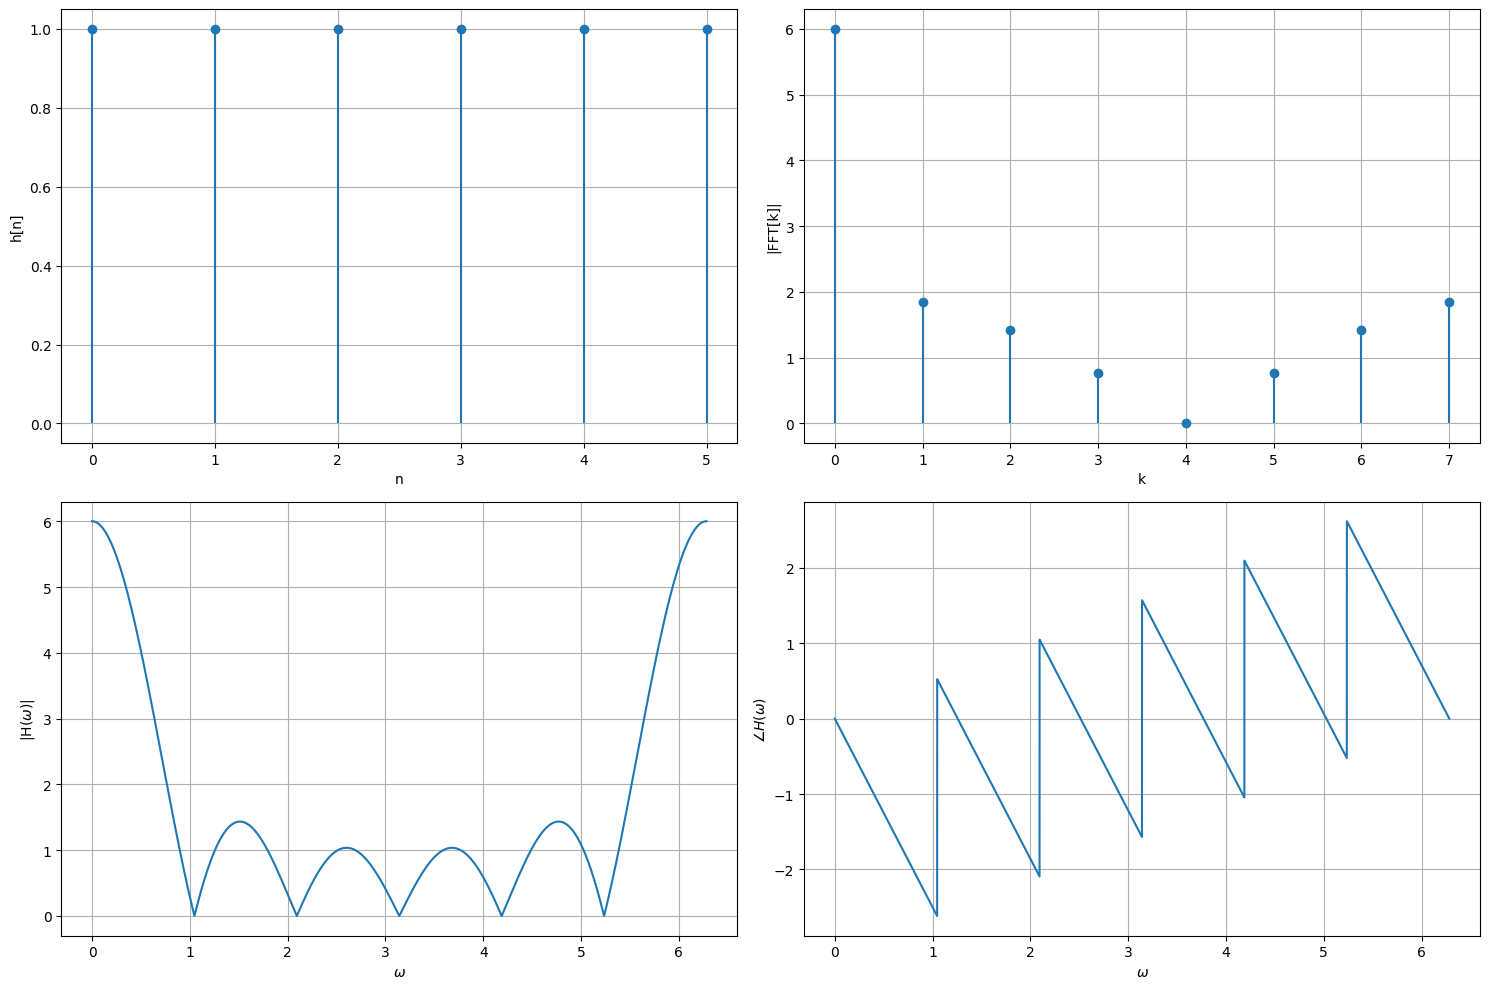

In [304]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

markerline, stemlines, baseline = axs[0,0].stem(h)
baseline.set_visible(False) 
axs[0,0].set_xlabel("n")
axs[0,0].set_ylabel("h[n]")
axs[0,0].grid(True)

markerline, stemlines, baseline = axs[0,1].stem(np.abs(fft))
baseline.set_visible(False) 
axs[0,1].set_xlabel("k")
axs[0,1].set_ylabel("|FFT[k]|")
axs[0,1].grid(True)

axs[1,0].plot(omega, np.abs(H))
axs[1,0].set_xlabel("$\omega$")
axs[1,0].set_ylabel("|H($\omega$)|")
axs[1,0].grid(True)

axs[1,1].plot(omega, np.angle(H))
axs[1,1].set_xlabel("$\omega$")
axs[1,1].set_ylabel(r"$\angle H(\omega)$")
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

## FIR Tipo 3

$$
H(e^{j\omega}) = e^{-j\omega M/2} \sum_{l=1}^{M/2} c[l]sin(\omega l)
$$

$$
c[l] =2h[M/2-l]
$$

In [305]:
M = 2

h = np.ones(M+1)
h[M//2] = 0
h[M//2+1::] = -1*h[0:M//2][::-1]

omega = np.linspace(0, 2*np.pi, 10000)
soma = 0
for l in range(1,M//2 + 1):
    soma = soma + 2*h[(M)//2 - l]*np.sin(omega*l)

H = np.exp(-1j*omega*M/2)*soma
fft = FFT.fft_completa(h,N=16)


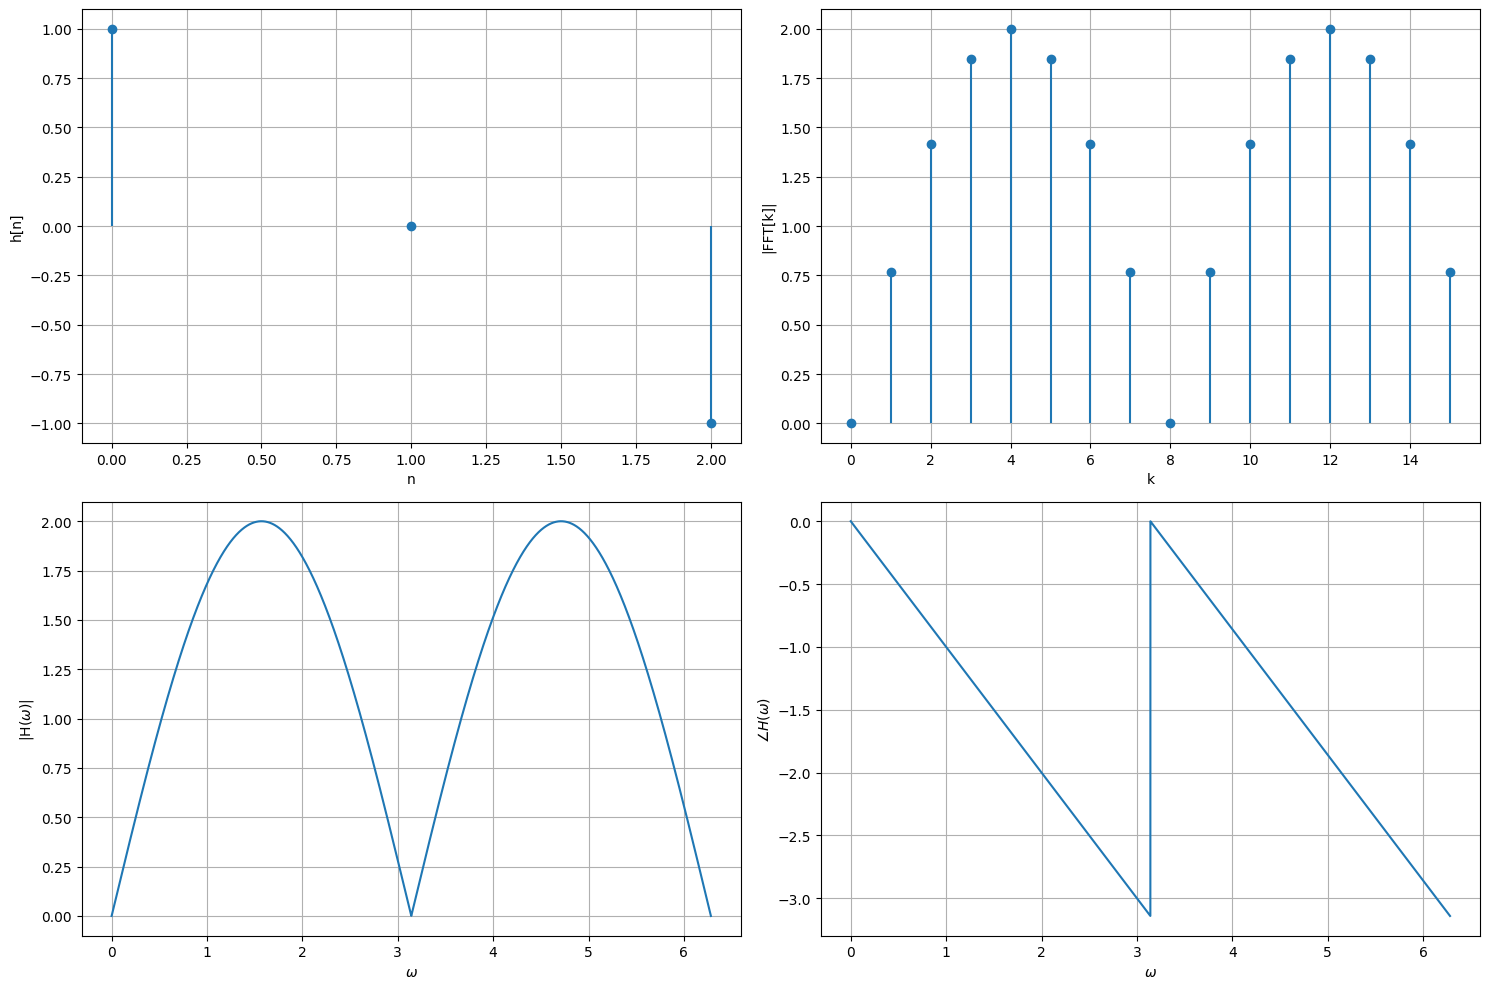

In [306]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

markerline, stemlines, baseline = axs[0,0].stem(h)
baseline.set_visible(False) 
axs[0,0].set_xlabel("n")
axs[0,0].set_ylabel("h[n]")
axs[0,0].grid(True)

markerline, stemlines, baseline = axs[0,1].stem(np.abs(fft))
baseline.set_visible(False) 
axs[0,1].set_xlabel("k")
axs[0,1].set_ylabel("|FFT[k]|")
axs[0,1].grid(True)

axs[1,0].plot(omega, np.abs(H))
axs[1,0].set_xlabel("$\omega$")
axs[1,0].set_ylabel("|H($\omega$)|")
axs[1,0].grid(True)

axs[1,1].plot(omega, np.angle(H))
axs[1,1].set_xlabel("$\omega$")
axs[1,1].set_ylabel(r"$\angle H(\omega)$")
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

## FIR Tipo 4

$$
H(e^{j\omega}) = e^{-j\omega M/2} \sum_{l=1}^{(M+1)/2} d[l]sin(\omega (l - \frac{1}{2}))
$$

$$
d[l] =2h[(M+1)/2-l]
$$

In [307]:
M = 5

h = np.ones(M+1)
h[(M+1)//2::] = -1*h[0:(M+1)//2][::-1]

omega = np.linspace(0, 2*np.pi, 1000)
soma = 0
for l in range(1,(M+1)//2 + 1):
    soma = soma + 2*h[(M+1)//2 - l]*np.sin(omega*(l-0.5))

H = np.exp(-1j*omega*M/2)*soma
fft = FFT.fft_completa(h)


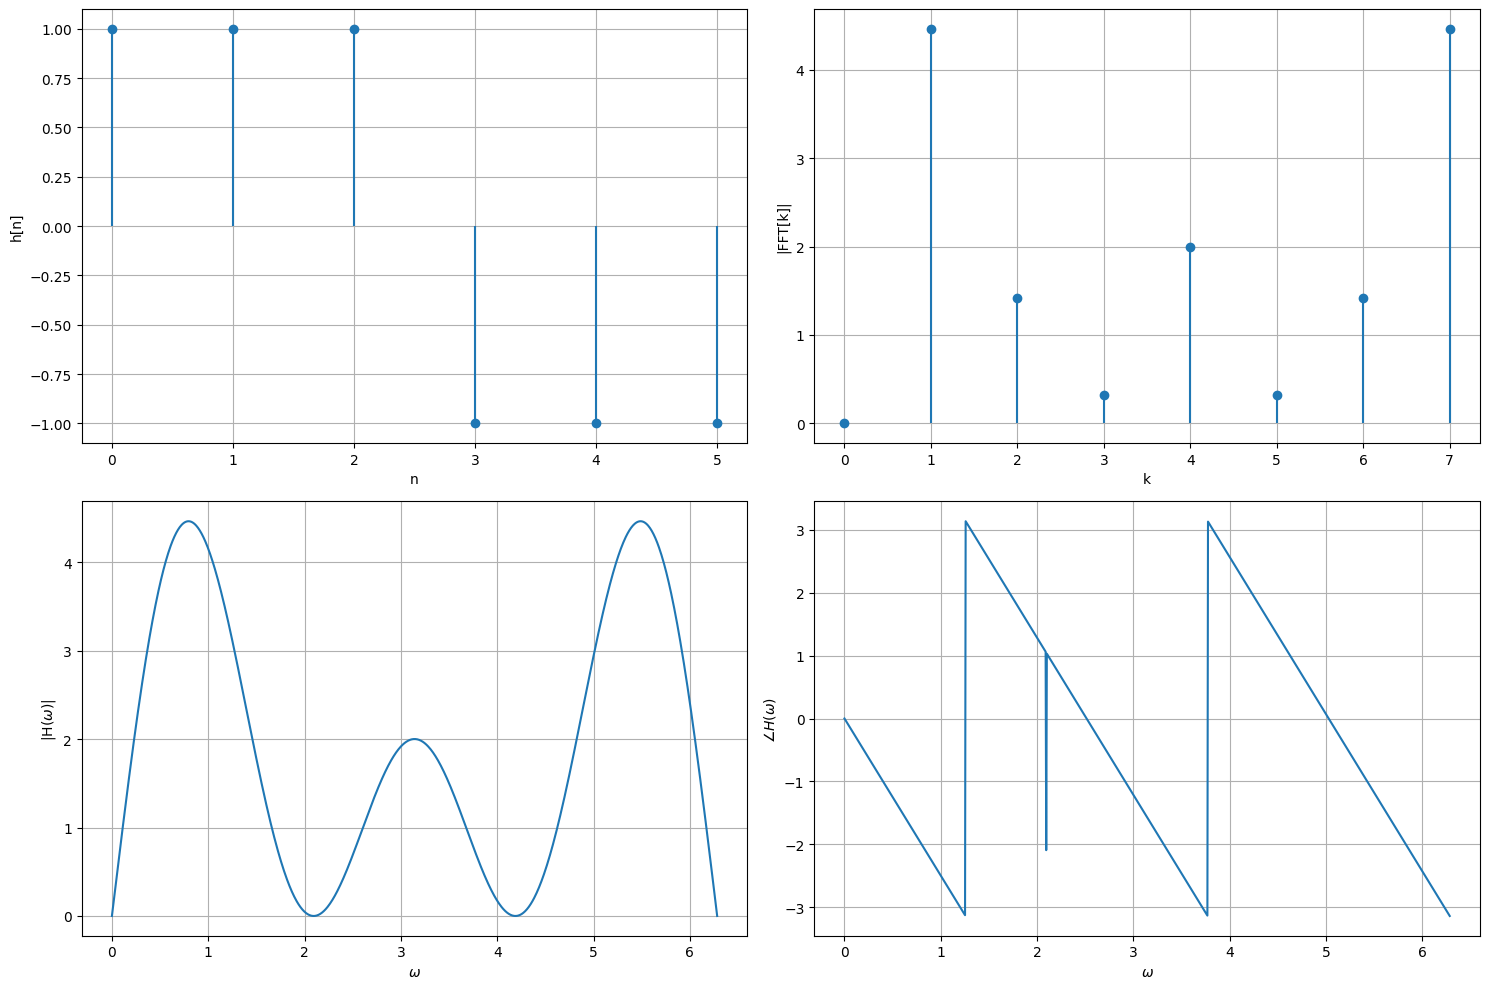

In [308]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

markerline, stemlines, baseline = axs[0,0].stem(h)
baseline.set_visible(False) 
axs[0,0].set_xlabel("n")
axs[0,0].set_ylabel("h[n]")
axs[0,0].grid(True)

markerline, stemlines, baseline = axs[0,1].stem(np.abs(fft))
baseline.set_visible(False) 
axs[0,1].set_xlabel("k")
axs[0,1].set_ylabel("|FFT[k]|")
axs[0,1].grid(True)

axs[1,0].plot(omega, np.abs(H))
axs[1,0].set_xlabel("$\omega$")
axs[1,0].set_ylabel("|H($\omega$)|")
axs[1,0].grid(True)

axs[1,1].plot(omega, np.angle(H))
axs[1,1].set_xlabel("$\omega$")
axs[1,1].set_ylabel(r"$\angle H(\omega)$")
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

## Filtro projetado

A resposta ao impulso utilizada é a **sinc**, cuja expressão é dada por:

$$
h[n] = \frac{sin(\omega_0 n)}{\pi n}
$$

In [309]:
#Usando filtro FIR tipo 1

def lowpass_tipo1(fc,fs,M,janela= "hanning",A =31):
    # Essa funcao realiza o projeto de um filtro FIR passa baixas do tipo I.
    # fc - frequencia de corte
    # fs - frequencia de amostragem
    # M - ordem do filtro. impoe atraso
    # janela - funcao que ira multiplicar a funcao de transferencia para alterar a atenuacao
    # A - atenuacao na banda de rejeicao. Apenas kaiser usa

    n = np.arange(M+1) - M/2 #simetria em relacao a origem

    # impulso ideal low-pass
    h = np.zeros(M+1) # ordem do filtro
    h = np.sin(2*np.pi*(fc/fs)*n) / (np.pi*n) # note que está sendo normalizada a frequencia
    h[M//2] = 2*fc/fs # em zero eh igual a 2*fc e ao normalizar divide por fs

    #janelas que podem ser usadas para alterar o comportamento da atenuacao do filtro. todas possuem o mesmo tamanho de h
    if (janela.lower() == 'hanning'):
        w = np.hanning(M+1)
    elif (janela.lower() == 'hamming'):
        w = np.hamming(M+1)
    elif (janela.lower() == 'blackman'):
        w = np.blackman(M+1)
    elif (janela.lower() == 'kaiser'):
        from scipy.signal import kaiser_beta
        beta = kaiser_beta(A)
        w = np.kaiser(M+1,beta)
    else:
        w = np.ones(M+1)

    h = h*w
    
    #repetindo o que foi feito para o FIR tipo 1
    omega = np.linspace(0, 2*np.pi, 10000)
    soma = 0

    for l in range(M//2 + 1):
        if (l == 0):
            soma = soma + h[M//2]*np.cos(omega*l)
        else:
            soma = soma + 2*h[M//2 - l]*np.cos(omega*l) 

    # H eh a resposta em frequencia
    H = np.exp(-1j*omega*M/2)*soma
    # como cada ponto de H eh uma amostra, eh preciso saber qual frequencia corresponde a cada amostra
    f = FFT.frequencia(fs,H)

    return h, H, f

def bandpass_tipo1(fc1,fc2,fs,M, janela = "hanning",A=31):
    
    # Essa funcao projeta dois filtros passa baixas, com diferentes fc e subtrai ambas as funcoes para assim obter o filtro passa band
    # fc1 - frequencia de corte 1
    # fc2 - frequencia de corte 2. fc2>fc1 para o filtro passa banda em questao
    # fs - frequencia de amostragem
    # M - ordem do filtro
    # janela - funcao que ira multiplicar a funcao de transferencia para alterar a atenuacao
    # A - atenuacao na banda de rejeicao

    # note que sera calculado as respostas ao impulso para cada frequencia de corte
    h1, H1, f1 = lowpass_tipo1(fc1,fs,M,janela,A)
    h2, H2, _ = lowpass_tipo1(fc2,fs,M,janela,A) 


    # O passa banda eh basicamente apenas a subtração de dois filtros low pass
    h = h2 - h1
    H = H2 - H1
    f = f1
    return h, H, f



C:\Users\gson5\AppData\Local\Temp\ipykernel_5764\171740346.py:15: RuntimeWarning: invalid value encountered in divide
  h = np.sin(2*np.pi*(fc/fs)*n) / (np.pi*n) # note que está sendo normalizada a frequencia


(3000.0, 5000.0)

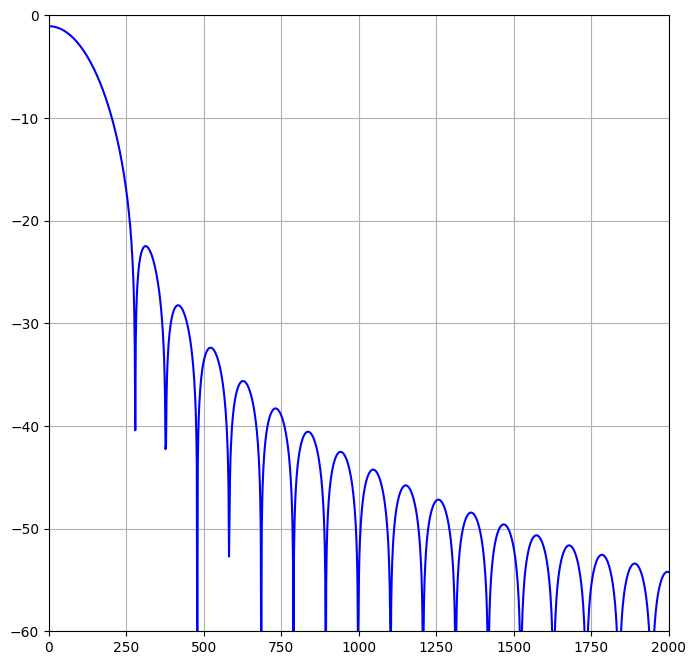

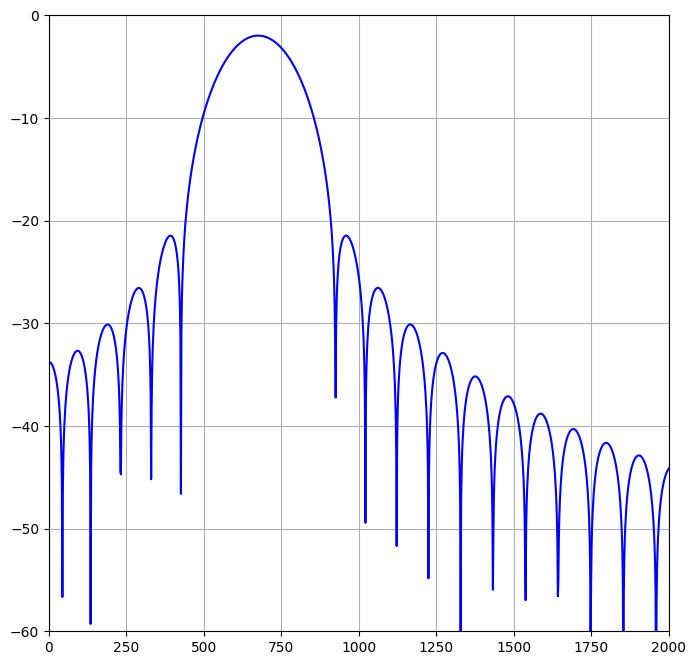

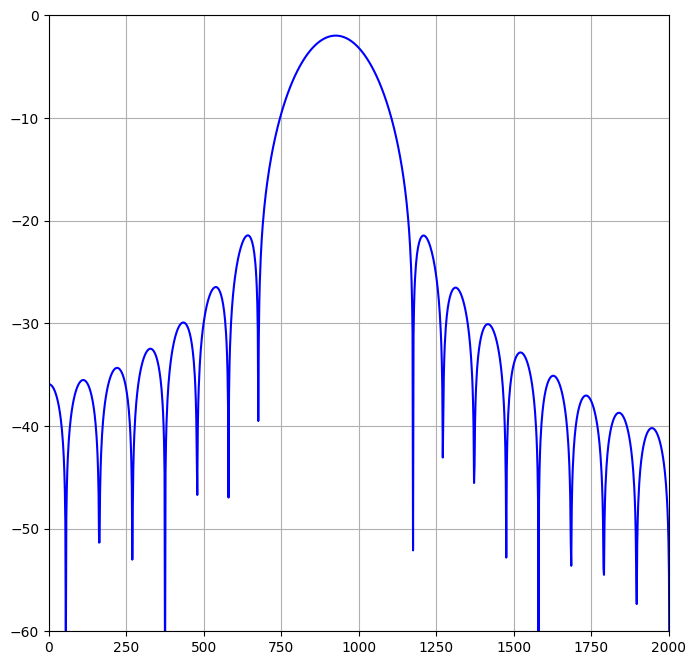

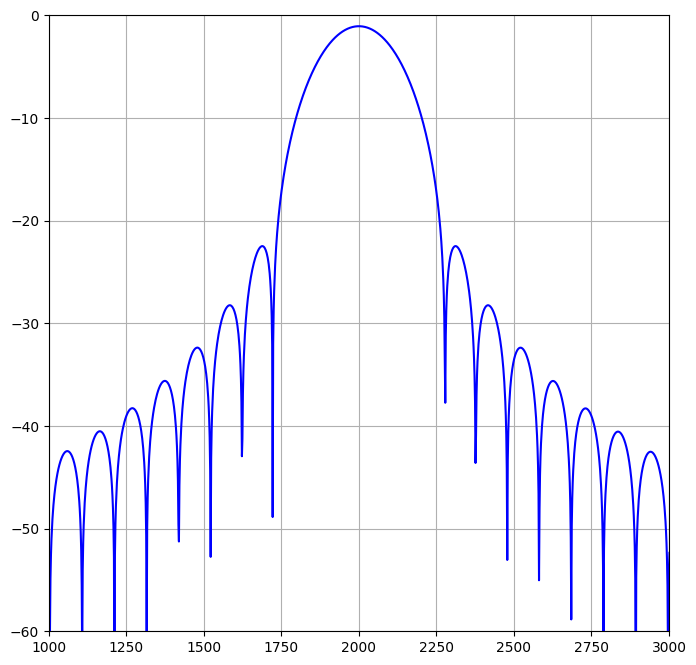

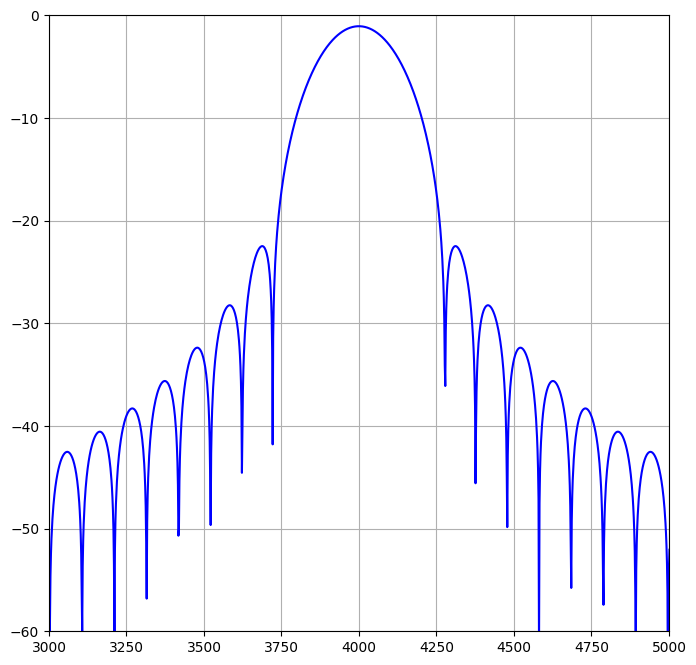

In [310]:
h_cos1,H_cos1,f1 = lowpass_tipo1(100,16000,150)
h_cos2,H_cos2,f2 = bandpass_tipo1(600,750,16000,150)
h_cos3,H_cos3,f3 = bandpass_tipo1(850,1000,16000,150)
h_cos4,H_cos4,f4 = bandpass_tipo1(1900,2100,16000,150)
h_cos5,H_cos5,f5 = bandpass_tipo1(3900,4100,16000,150)

plt.figure(figsize=(8,8))
plt.plot(f1, 10*np.log10(np.abs(H_cos1[0:len(H_cos1)//2])), color = "blue")
plt.grid()
plt.xlim(0,2000)
plt.ylim(-60,0)


plt.figure(figsize=(8,8))
plt.plot(f2, 10*np.log10(np.abs(H_cos2[0:len(H_cos2)//2])), color = "blue")
plt.grid()
plt.ylim(-60,0)
plt.xlim(0,2000)

plt.figure(figsize=(8,8))
plt.plot(f3, 10*np.log10(np.abs(H_cos3[0:len(H_cos3)//2])), color = "blue")
plt.grid()
plt.ylim(-60,0)
plt.xlim(0,2000)

plt.figure(figsize=(8,8))
plt.plot(f4, 10*np.log10(np.abs(H_cos4[0:len(H_cos4)//2])), color = "blue")
plt.grid()
plt.ylim(-60,0)
plt.xlim(1000,3000)

plt.figure(figsize=(8,8))
plt.plot(f5, 10*np.log10(np.abs(H_cos5[0:len(H_cos5)//2])), color = "blue")
plt.grid()
plt.ylim(-60,0)
plt.xlim(3000,5000)


In [311]:
print("Tamanho da função de transferencia h[n] =",len(h_cos1))
print("Tamanho do áudio =",len(audio))
print("Tamanho do resultado da convolução entre h[n] e o áudio =",len(audio)+len(h_cos1)-1)

Tamanho da função de transferencia h[n] = 151
Tamanho do áudio = 319336
Tamanho do resultado da convolução entre h[n] e o áudio = 319486


In [312]:
cos1 = FFT.convolucao(h_cos1, audio)
cos2 = FFT.convolucao(h_cos2, audio)
cos3 = FFT.convolucao(h_cos3, audio)
cos4 = FFT.convolucao(h_cos4, audio)
cos5 = FFT.convolucao(h_cos5, audio)

In [313]:
print("Tamanho do resultado da convolução =", len(cos1))

Tamanho do resultado da convolução = 319486


C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Cre

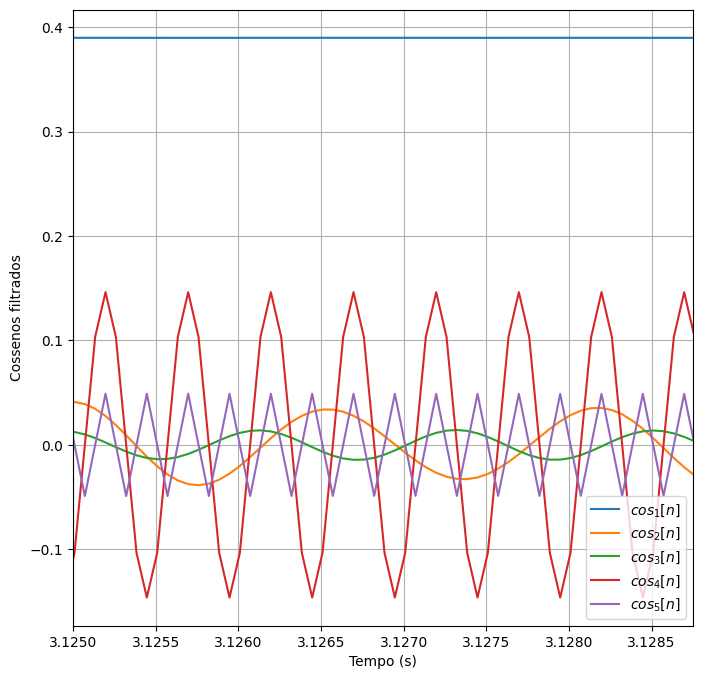

In [314]:
plt.figure(figsize=(8,8))
for i in range(5):
    cos_wave = globals()[f'cos{i+1}']
    plt.plot(tempo, cos_wave[0:len(tempo)], label = f"$cos_{i+1}[n]$")
plt.xlim(1/16000 *50000,1/16000 *50060)
plt.legend()
plt.ylabel("Cossenos filtrados")
plt.xlabel("Tempo (s)")
plt.grid()


In [315]:
comparar = (cos1+cos2+cos3+cos4+cos5)
audio_comparacao = np.int16(comparar / np.max(np.abs(comparar)) * 32767)
wav.write('audio_comparacao.wav', fs, audio_comparacao) 

fs_comparacao, audio_comparacao = wav.read('audio_comparacao.wav')  

if audio_comparacao.dtype != np.float32:
    audio_comparacao = audio_comparacao / np.iinfo(audio_comparacao.dtype).max #normalizado


C:\Users\gson5\AppData\Local\Temp\ipykernel_5764\3091849433.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  audio_comparacao = np.int16(comparar / np.max(np.abs(comparar)) * 32767)


C:\Users\gson5\AppData\Local\Temp\ipykernel_5764\3562810513.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


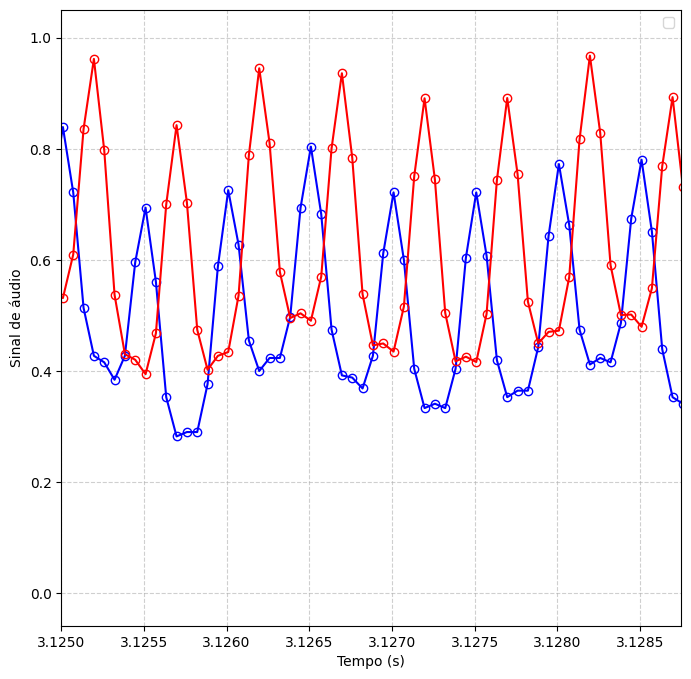

In [316]:
plt.figure(figsize=(8,8))
plt.plot(tempo, audio, "-o", color="blue", markerfacecolor = 'None')
plt.plot(tempo, audio_comparacao[0:len(tempo)], "-o", color="red", markerfacecolor = 'None')
plt.ylabel("Sinal de áudio")
plt.xlabel("Tempo (s)")
plt.xlim(1/16000 *50000,1/16000 *50060)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)